In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("spotify.csv")
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [6]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [18]:
cat_col = [col for col in df.columns if df[col].dtype=="object"]
num_col = [col for col in df.columns if df[col].dtype!="object"]

In [19]:
cat_col

['Artist', 'Track Name', 'Track ID']

In [20]:
num_col

['Popularity', 'Duration (ms)']

1. Identify the top 5 popular artists based on the mean popularity of their tracks.Show the mean popularity of tracks for the top 5 popular artists Using BarPlot.

top 5 artists based on mean popularity:
            Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


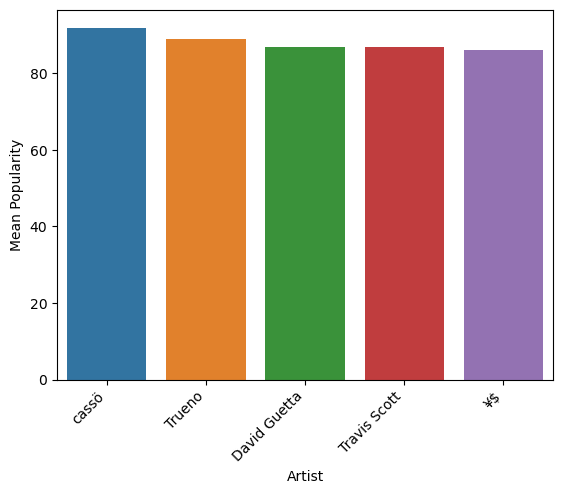

In [38]:
avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()
top_5_artists = avg_popularity.sort_values(by="Popularity", ascending=False).head(5)
top_5_artists.columns = ["Artist", "Popularity"]
print(f"top 5 artists based on mean popularity:\n {top_5_artists}")
sns.barplot(x="Artist", y="Popularity", data=top_5_artists)
plt.xlabel("Artist")
plt.ylabel("Mean Popularity")
plt.xticks(rotation=45, ha="right")
plt.show()

2. Determine the top 5 popular songs based on their popularity ratings.Display the popularity ratings of the top 5 popular songs using BarPlot.

top 5 songs based on mean popularity:
                      Track Name  Popularity
181                 Lovin On Me        97.0
410                      redrum        96.0
57                     CARNIVAL        96.0
87   FE!N (feat. Playboi Carti)        93.0
259                       Prada        92.0


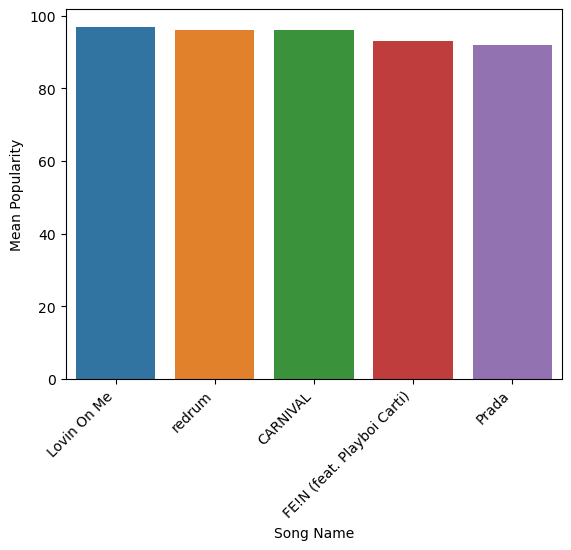

In [41]:
avg_popularity_rating = df.groupby("Track Name")["Popularity"].mean().reset_index()
top_5_songs = avg_popularity_rating.sort_values(by="Popularity", ascending=False).head()
top_5_songs.columns = ["Track Name", "Popularity"]
print(f"top 5 songs based on mean popularity:\n {top_5_songs}")
sns.barplot(x="Track Name", y="Popularity", data=top_5_songs)
plt.xlabel("Song Name")
plt.ylabel("Mean Popularity")
plt.xticks(rotation=45, ha="right")
plt.show()

3. Find the top 5 trending genres based on the mean popularity of tracks within each genre.Visualize the mean popularity of tracks for the top 5 trending genres

top 5 artists based on mean popularity:
            Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


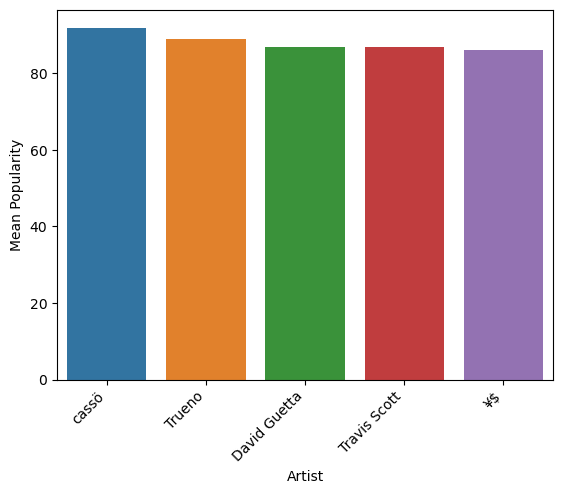

In [55]:
avg_popularity = df.groupby("Artist")["Popularity"].mean().reset_index()
top_5_artists = avg_popularity.sort_values(by="Popularity", ascending=False).head(5)
top_5_artists.columns = ["Artist", "Popularity"]
print(f"top 5 artists based on mean popularity:\n {top_5_artists}")
sns.barplot(x="Artist", y="Popularity", data=top_5_artists)
plt.xlabel("Artist")
plt.ylabel("Mean Popularity")
plt.xticks(rotation=45, ha="right")
plt.show()

4. Identify the top 5 longest songs among the tracks of the top 5 popular artists.Represent the duration of the top 5 longest songs among the tracks of the top 5 popular artists using BarPlot

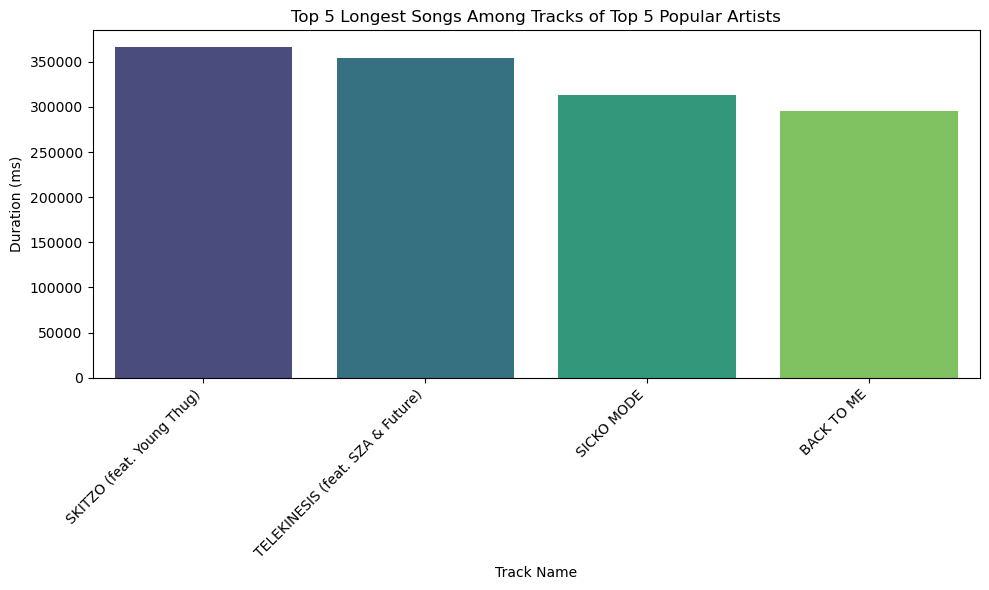

                           Track Name  Duration (ms)
173         SKITZO (feat. Young Thug)         366592
38   TELEKINESIS (feat. SZA & Future)         353754
52   TELEKINESIS (feat. SZA & Future)         353754
37                         SICKO MODE         312820
263                        BACK TO ME         295471


In [58]:
top_5_popular_artists = df.groupby('Artist')['Popularity'].mean().nlargest(5).index

filtered_df = df[df['Artist'].isin(top_5_popular_artists)]

top_5_longest_songs = filtered_df.nlargest(5, 'Duration (ms)')

plt.figure(figsize=(10, 6))
sns.barplot(x='Track Name', y='Duration (ms)', data=top_5_longest_songs, palette='viridis')
plt.title('Top 5 Longest Songs Among Tracks of Top 5 Popular Artists')
plt.xlabel('Track Name')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(top_5_longest_songs[['Track Name', 'Duration (ms)']])


5. Determine the top 5 most danceable songs based on their danceability scores.Illustrate the danceability scores of the top 5 most danceable songs using PieChart.

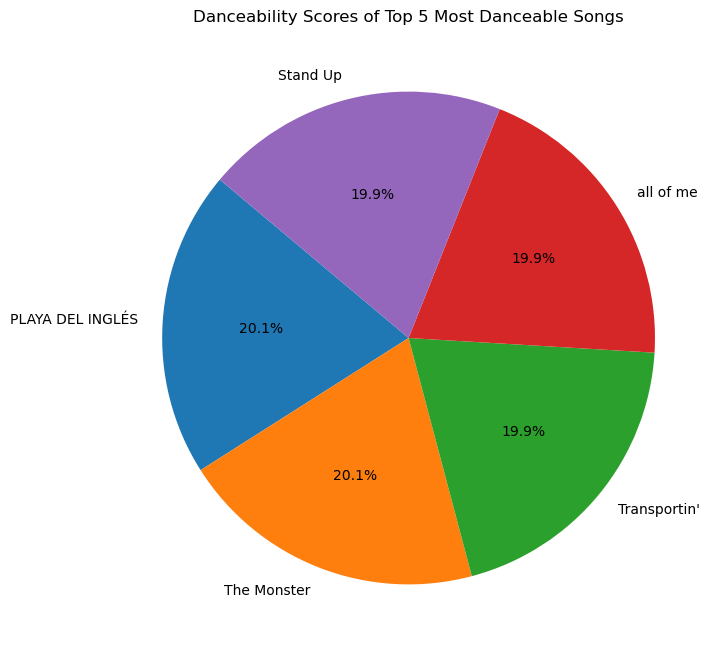

          Artist        Track Name  Popularity  Duration (ms)  \
199      Quevedo  PLAYA DEL INGLÉS          77         237525   
89        Eminem       The Monster          82         250188   
397  Kodak Black      Transportin'          76         169344   
77     21 Savage         all of me          84         198292   
374     Ludacris          Stand Up          64         213760   

                   Track ID  danceability_scores  
199  0Sfn2TYbpQtCGMBf6C0Y6T                  100  
89   48RrDBpOSSl1aLVCalGl5C                  100  
397  1WIZiOuNO3woKfdlSK2gNn                   99  
77   2FoahzOSxJnalPA8aBUme3                   99  
374  2CtCwQhY0ZLvr8L2l8Bo6e                   99  


In [61]:
np.random.seed(0)
df['danceability_scores'] = np.random.randint(0, 101, size=len(df))
top_5_most_danceable = df.sort_values(by='danceability_scores', ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(top_5_most_danceable['danceability_scores'], labels=top_5_most_danceable['Track Name'], autopct='%1.1f%%', startangle=140)
plt.title('Danceability Scores of Top 5 Most Danceable Songs')
plt.show()
print(top_5_most_danceable)